In [17]:
import math as m
import numpy as np
from IPython.display import clear_output
from time import sleep
from scipy.signal import savgol_filter
import physt
import os
import pandas as pd
from pandas import DataFrame, Series  # for convenience
#from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3
import pims
import trackpy as tp

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

In [19]:
#change the current working directory to that with data:
str_cwd = r'g:\My Drive\workAppState\prj_shocks\expData\data20230207\soliton_240fps_63-1\analysis\20230304polar\02_an_workFlow_Polar'

In [20]:
os.chdir(str_cwd)

In [21]:
os.chdir(r'./inputs')

In [22]:
os.getcwd()

'g:\\My Drive\\workAppState\\prj_shocks\\expData\\data20230207\\soliton_240fps_63-1\\analysis\\20230304polar\\02_an_workFlow_Polar\\inputs'

In [ ]:
#select ROI and range of frames of interest:
curDate=r'20230220' #current date
framesSkip = 10
#define borders of the region of interest
leftBorder = 56.0
rightBorder= 440.0
yMin = 120.0
yMax = 1412.0
#start and and frames
iBegin = 180
iEnd =  1168
dY = 30.0 # width of a bin in the histogram
nB = m.floor((yMax - yMin)/dY)
yBins = np.arange(nB) * dY + yMin + dY/2.0
yBins # bins values for the histogram

In [29]:
mpl.rc('figure',  figsize=(5, 5.0*1392.0/496.0))
mpl.rc('image', cmap='gray')

In [30]:
frames = pims.open(r'./*.tif')
frames

<Frames>
Source: g:\My Drive\workAppState\prj_shocks\expData\data20230207\soliton_240fps_63-1\analysis\20230304polar\02_an_workFlow_Polar\inputs\*.tif
Length: 300 frames
Frame Shape: (1392, 496)
Pixel Datatype: uint8

In [31]:
type(frames)

pims.image_sequence.ImageSequence

In [32]:
type(frames[0])

pims.frame.Frame

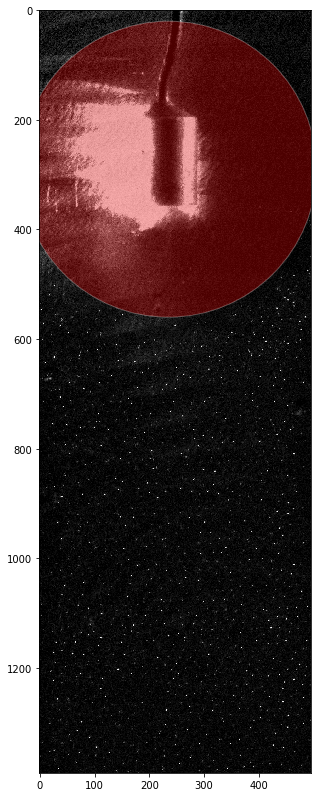

In [61]:
fig, ax = plt.subplots()
circle1 = plt.Circle((235, 290), 270, color='r', alpha = 0.3, edgecolor = 'w')
circle1.set_edgecolor('w')
ax.add_patch(circle1)
ax = plt.imshow(frames[180])

In [ ]:
f = tp.locate(frames[0], 3)

In [ ]:
tp.annotate(f, frames[0])

In [ ]:
f.head(20)

In [ ]:
f = tp.locate(frames[233], 7, minmass = 100, separation = 2, threshold = 5)
tp.annotate(f, frames[233])

In [ ]:
f.head()

In [ ]:
f.tail()

In [ ]:
f_all = tp.batch(frames[:], 7, minmass = 100, separation = 2, threshold = 5)

In [ ]:
def f_check_limited(x, y, frame, frame_begin, frame_end, left, right, maxY, minY):
    if (x <= right and x >= left and y <= maxY and y >= minY 
        and frame >= frame_begin and frame <= frame_end):
        return True
    else:
        return False
    

In [ ]:
#vectorize the function f_check_limited, so can apply to arrays:
f_check_if_ROI = np.vectorize(f_check_limited)

In [ ]:
ind = f_check_if_ROI(f_all['x'], f_all['y'], f_all['frame'], iBegin, iEnd, leftBorder, rightBorder, yMax, yMin)

In [ ]:
f_ROI = f_all[ind]

In [ ]:
f_all.tail()

In [ ]:
f_ROI.tail()

In [ ]:
#visual control if we correctly determined ROI:
tp.annotate(f_ROI[f_ROI['frame'] == 233], frames[233])

In [ ]:
mpl.rc('figure',  figsize=(6, 4))
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()

In [ ]:
for i in range(iBegin, iEnd, framesSkip):
    print('frame ', i)
    #building histogram using cloud-in-cell (cic):
    indf = f_ROI['frame'] == i
    f_ROI_i = f_ROI[indf]
    YforHist = (np.array(f_ROI_i['y']) - yMin)/(yMax-yMin + 1.0E-8) * np.double(nB)
    weighNumDens = np.full(len(YforHist), np.double(1), dtype = np.double)
    histNumDens = cic(weighNumDens, YforHist, nB) / dY / (rightBorder - leftBorder)
    clear_output(wait = True)
    ax.cla()
    ax.scatter(yBins, histNumDens)
    sleep(2)
    
    

In [ ]:
indf = f_ROI['frame'] == 233
f_ROI_i = f_ROI[indf]
counts, bins = np.histogram(f_ROI_i['y'], nB)
counts = np.array(counts, dtype = np.double)
YforHist = 0.5 * (bins[1:] + bins[:-1])
f1, ax1 = plt.subplots()
print(counts)
ax1.scatter(YforHist, counts)



In [ ]:
counts_smoothed = savgol_filter(counts, 5, 2)

In [ ]:
ax1.plot(YforHist, counts_smoothed)
f1

In [ ]:
x = np.array([2, 2, 5, 2, 1, 0, 1, 4, 9])

In [ ]:
savgol_filter(x, 5, 2)

In [ ]:
type(counts)

In [ ]:
type(x)

In [ ]:
counts

In [ ]:
x